In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import pandas as pd

https://lmfit.github.io/lmfit-py/

In [2]:
from pyndamics3 import Simulation

pyndamics3  version  0.0.29


In [4]:
t_data=array([7,14,21,28,35,42,49,56,63,70,77,84],float)
h_data=array([17.93,36.36,67.76,98.10,131,169.5,205.5,228.3,247.1,250.5,253.8,254.5])

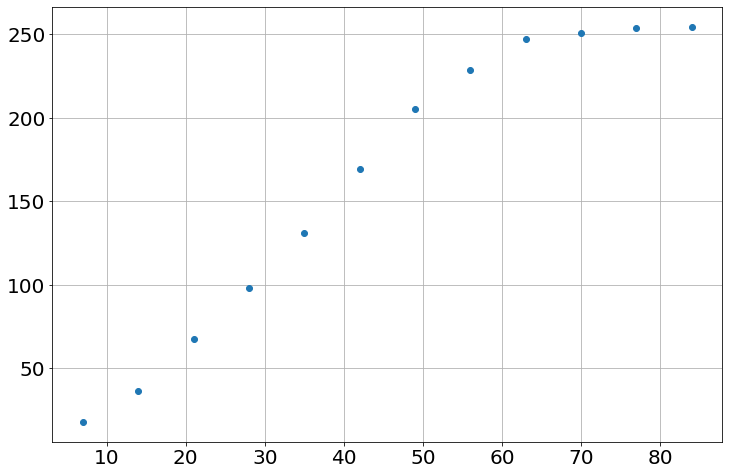

In [5]:
plot(t_data,h_data,'o')

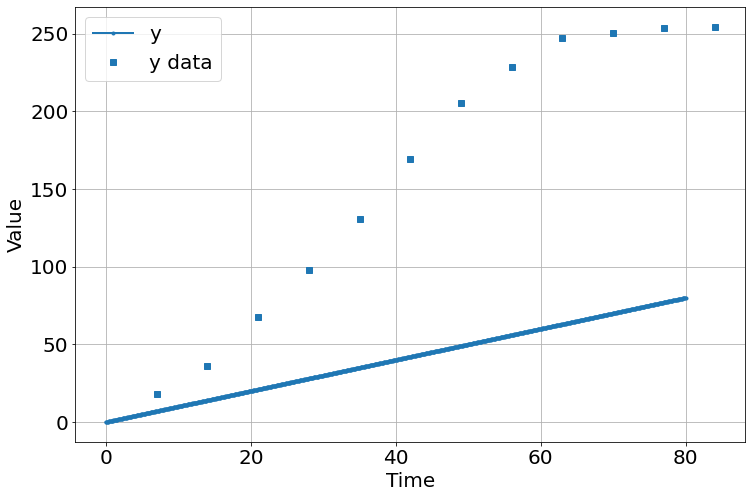

<Figure size 864x576 with 0 Axes>

In [6]:
sim=Simulation()
sim.add("y' = a",0,plot=True)
sim.add_data(t=t_data,y=h_data,plot=True)
sim.params(a=1)
sim.run(80)

In [3]:
from pyndamics3.fit import fit, Parameter

In [8]:
results=fit(sim,
           Parameter("a",value=1,min=0))

In [9]:
results

In [10]:
sim.a

3.5599846140188287

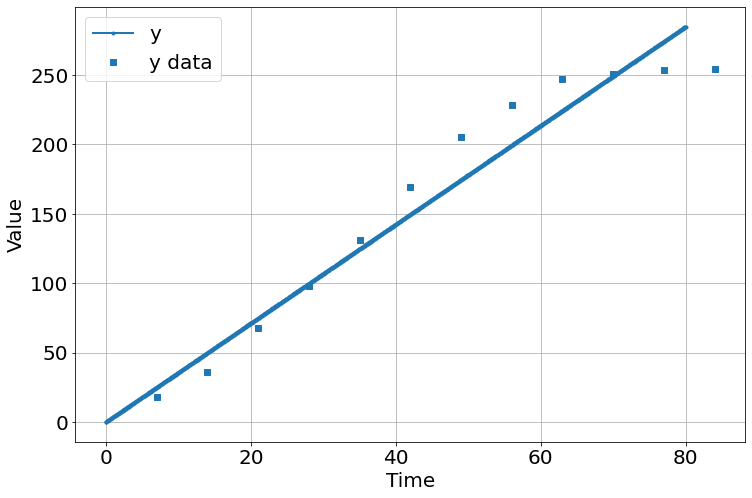

<Figure size 864x576 with 0 Axes>

In [11]:
sim.run(80)

## Logistic growth

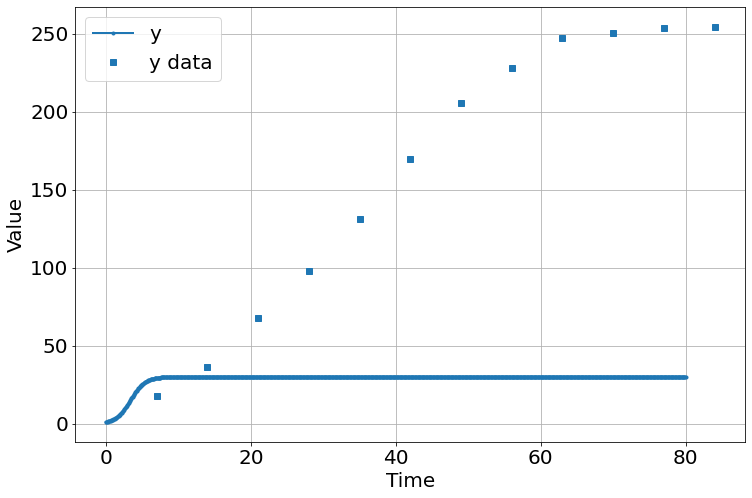

<Figure size 864x576 with 0 Axes>

In [12]:
sim=Simulation()
sim.add("y' = a*y*(1-y/k)",1,plot=True)
sim.params(a=1,k=30)
sim.add_data(t=t_data,y=h_data,plot=True)
sim.run(80)

In [17]:
results=fit(sim,
           Parameter("a",value=1,min=0,max=10),
           Parameter("k",value=30,min=0),
           )

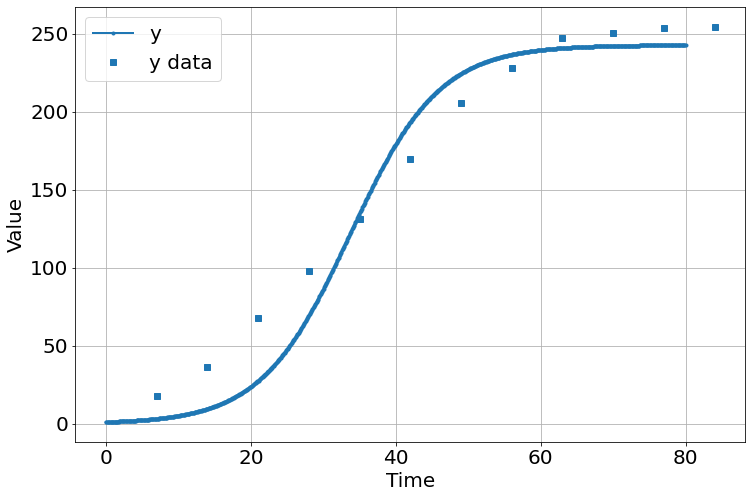

<Figure size 864x576 with 0 Axes>

In [18]:
sim.run(80)

In [16]:
results

In [22]:
results=fit(sim,
           Parameter("a",value=1,min=0,max=10),
           Parameter("initial_y",value=1,min=0),
           Parameter("k",value=30,min=0),
           )
results

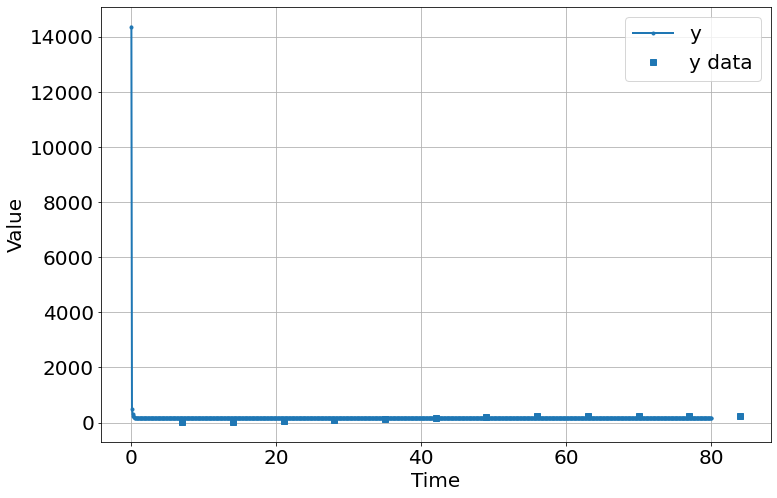

<Figure size 864x576 with 0 Axes>

In [20]:
sim.run(80)

In [25]:
results=fit(sim,
           Parameter("a",value=1,min=0,max=10),
           Parameter("initial_y",value=1,min=0,max=20),
           Parameter("k",value=30,min=0),
           )
results

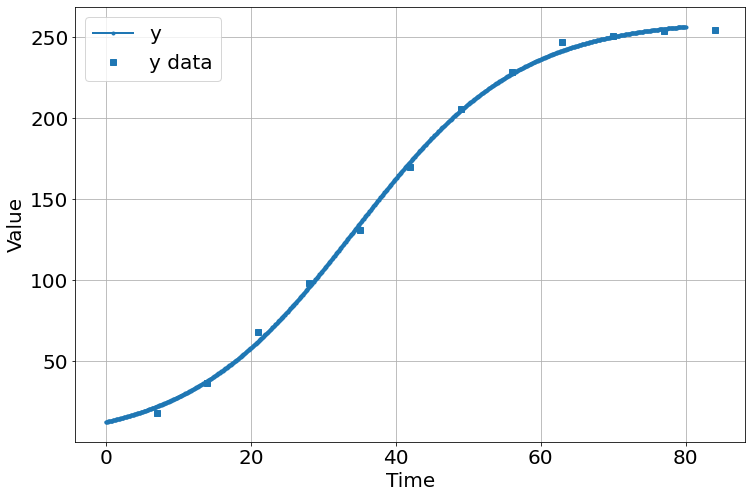

<Figure size 864x576 with 0 Axes>

In [26]:
sim.run(80)

https://lmfit.github.io/lmfit-py/fitting.html?highlight=powell  methods described here, Powell works sometimes

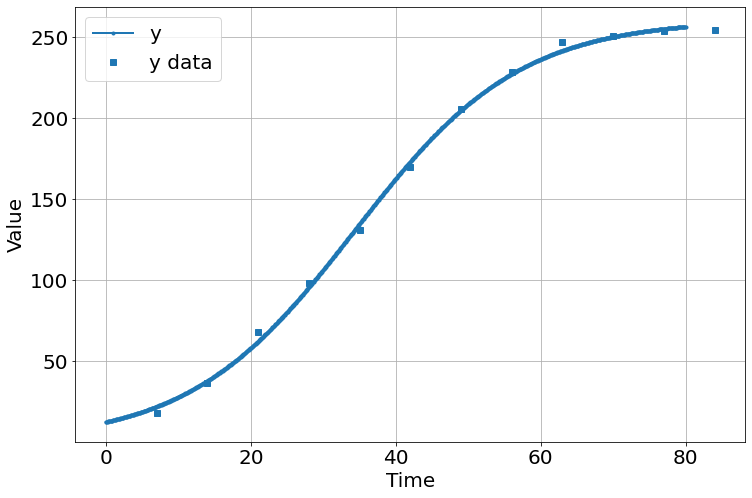

<Figure size 864x576 with 0 Axes>

In [28]:
results=fit(sim,
           Parameter("a",value=1,min=0,max=10),
           Parameter("initial_y",value=1,min=0),
           Parameter("k",value=30,min=0),
            method="Powell"
           )
sim.run(80)
results

## population data

In [10]:
data=pd.read_csv('data/s007.csv')
x_data=data['year']-1700
y_data=data['population (millions)']
data

,year,population (millions),source
0,1700.0,5.835,Griffith
1,1710.0,6.013,Griffith
2,1720.0,6.048,Griffith
3,1730.0,6.008,Griffith
4,1740.0,6.013,Griffith
5,1750.0,6.253,Griffith
6,1760.0,6.665,Griffith
7,1770.0,7.124,Griffith
8,1780.0,7.581,Griffith
9,1790.0,8.216,Griffith


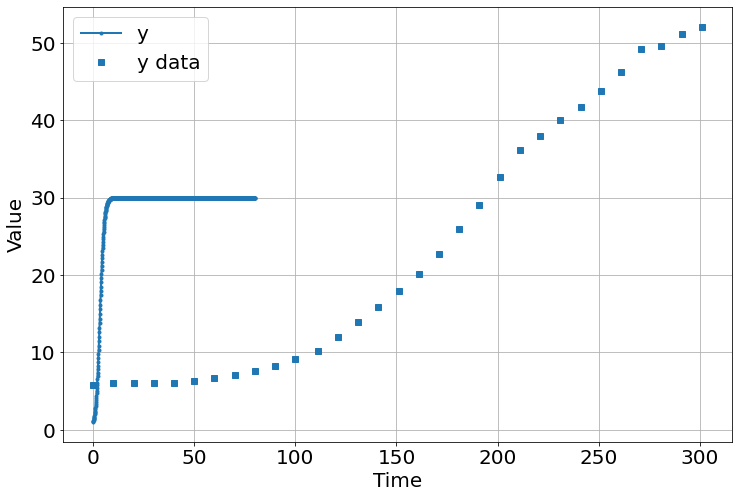

<Figure size 864x576 with 0 Axes>

In [11]:
sim=Simulation()
sim.add("y' = a*y*(1-y/k)",1,plot=True)
sim.params(a=1,k=30)
sim.add_data(t=x_data,y=y_data,plot=True)
sim.run(80)

In [12]:
results=fit(sim,
           Parameter("a",value=1,min=0,max=10),
           Parameter("initial_y",value=1,min=0,max=20),
           Parameter("k",value=30,min=0),
           )
results

ValueError: NaN values detected in your input data or the output of your objective/model function - fitting algorithms cannot handle this! Please read https://lmfit.github.io/lmfit-py/faq.html#i-get-errors-from-nan-in-my-fit-what-can-i-do for more information.

How to deal with nans -- drop them when you load them from pandas

In [13]:
data=pd.read_csv('data/s007.csv')
data=data.dropna()
x_data=data['year']-1700
y_data=data['population (millions)']
data

,year,population (millions),source
0,1700.0,5.835,Griffith
1,1710.0,6.013,Griffith
2,1720.0,6.048,Griffith
3,1730.0,6.008,Griffith
4,1740.0,6.013,Griffith
5,1750.0,6.253,Griffith
6,1760.0,6.665,Griffith
7,1770.0,7.124,Griffith
8,1780.0,7.581,Griffith
9,1790.0,8.216,Griffith


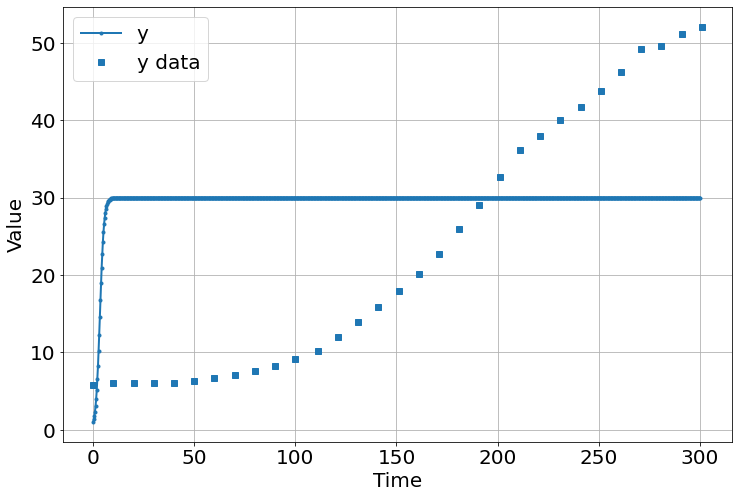

<Figure size 864x576 with 0 Axes>

In [18]:
sim=Simulation()
sim.add("y' = a*y*(1-y/k)",1,plot=True)
sim.params(a=1,k=30)
sim.add_data(t=x_data,y=y_data,plot=True)
sim.run(300)

In [19]:
results=fit(sim,
           Parameter("a",value=1,min=0,max=10),
           Parameter("initial_y",value=1,min=0,max=20),
           Parameter("k",value=30,min=0),
           )
results

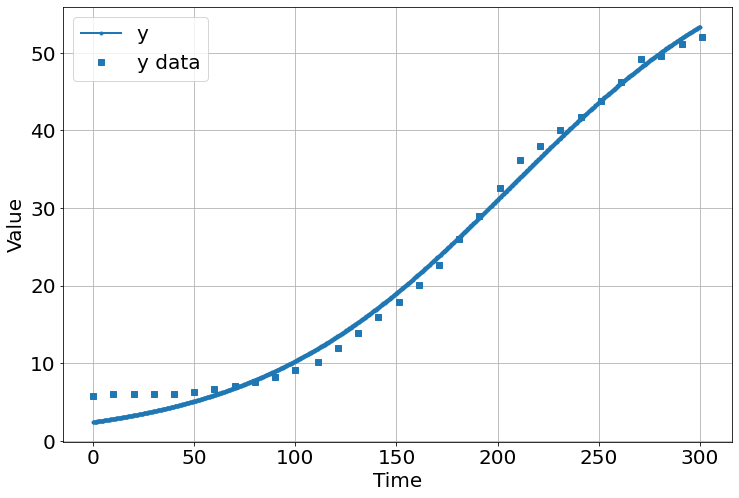

<Figure size 864x576 with 0 Axes>

In [20]:
sim.run(300)

Text(0.5, 0, 'time [minutes]')

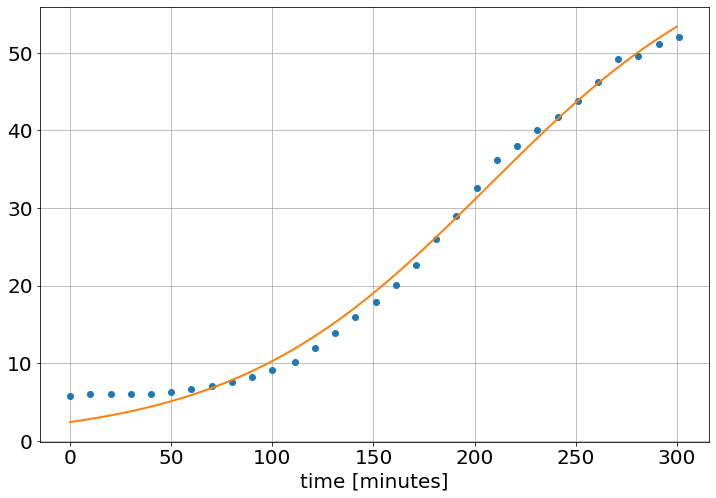

In [22]:
plot(x_data,y_data,'o')
plot(sim.t,sim.y,'-')
xlabel('time [minutes]')